In [66]:
import numpy as np
from scipy.optimize import curve_fit

from uncertainties import ufloat, unumpy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [67]:
# To use LaTeX and select Helvetica as the default font, without editing matplotlibrc use:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

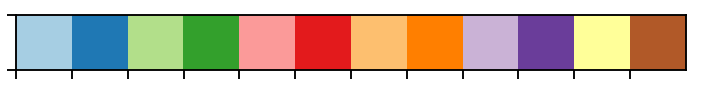

In [68]:
sns.set_context('talk')
sns.palplot(sns.color_palette("Paired"))

# Constants

In [69]:
C = 299792458 # Speed of light [m Hz]

In [70]:
# 88Sr Rydberg constant and ionization energy from 10.1103/PhysRevA.99.022503
I_88 =  ufloat(1377012721, 10)/(100*C/1E6)
RY_88 = ufloat(109736.6308675, 0.0000007) # [/cm]


d_1S0 = [ufloat(3.26896, 0.00002), ufloat(-0.138, 0.007), ufloat(0.9, 0.6)] # From Vaillant2012.JPB.45.135004
d_3S1 = [ufloat(3.370778, 0.000004), ufloat(0.418, 0.001), ufloat(-0.3, 0.1)] # From 10.1103/PhysRevA.99.022503

d_1D2 = [ufloat(2.3807, 0.0002), ufloat(-39.41, 0.06), ufloat(-109, 2)*1E1] # From Vaillant2012.JPB.45.135004
d_3D1 = [ufloat(2.67517, 0.00020), ufloat(-13.15, 0.26), ufloat(-4.444, 0.091)*1E3] # From 10.1103/PhysRevA.99.022503
d_3D2 = [ufloat(2.66142, 0.00030), ufloat(-16.77, 0.38), ufloat(-6.656, 0.134)*1E3] # From 10.1103/PhysRevA.99.022503
d_3D3 = [ufloat(2.63, 0.01), ufloat(-42.3, 0.3), ufloat(-18, 1)*1E3] # From Vaillant2012.JPB.45.135004

# Hyperfine contact interaction
a_5s = ufloat(-1000473.673, 0.011)/1E6 # [GHz] from Sunaoshi1993.HI.78.241

# Some general use functions

In [71]:
# Calculate quantum defect
def qd(n, d0, d2, d4):
    return d0 + d2/(n-d0)**2 + d4/(n-d0)**4

def E_Ryd(n, I_S, RY, d):
    [d0, d2, d4] = d
    return I_S - RY/(n-qd(n, d0, d2, d4))**2

# $n$-scaling of splittings

Producing a figure similar to Fig. 1 in the 87Sr spectroscopy paper.

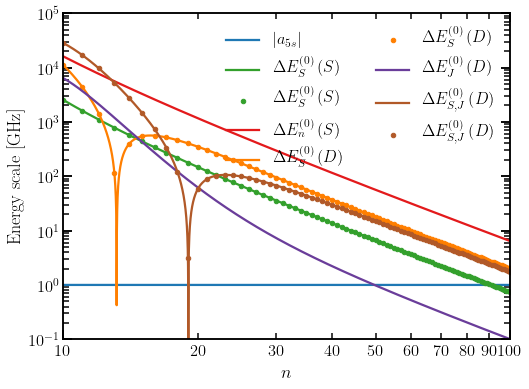

In [148]:
n = np.geomspace(10, 100, 10001, endpoint=True)
n_pnts = np.arange(10, 101, 1)

[fig, ax] = plt.subplots(figsize=(8,6))

# Hyperfine interaction strength (based on the 87Sr+ hyperfine contact interaction A in [GHz])
EV_hf = np.abs(a_5s*np.ones(len(n)))
ax.plot(n, unumpy.nominal_values(EV_hf),
         label=r'$\left|a_{5s}\right|$',
         color=sns.color_palette("Paired")[1])

# E^{0}_{S}: energy splitting between |5sns, 1S0> and |5sns, 3S1> states
DeltaE_S = np.abs(E_Ryd(n, I_88, RY_88, d_1S0) - E_Ryd(n, I_88, RY_88, d_3S1))*(100*C/1E9)
ax.plot(n, unumpy.nominal_values(DeltaE_S),
         label=r'${\Delta}E^{\left(0\right)}_{S} \left(S\right)$',
         color=sns.color_palette("Paired")[3])
DeltaE_S = np.abs(E_Ryd(n_pnts, I_88, RY_88, d_1S0) - E_Ryd(n_pnts, I_88, RY_88, d_3S1))*(100*C/1E9)
ax.plot(n_pnts, unumpy.nominal_values(DeltaE_S), '.',
         label=r'${\Delta}E^{\left(0\right)}_{S} \left(S\right)$',
         color=sns.color_palette("Paired")[3])

# E^{0}_{n}: energy splitting between |5sns, 1S0> and |5s(n+1)s, 3S1> states
DeltaE_n = np.abs(E_Ryd(n+1, I_88, RY_88, d_3S1) - E_Ryd(n, I_88, RY_88, d_1S0))*(100*C/1E9)
ax.plot(n, unumpy.nominal_values(DeltaE_n),
         label=r'${\Delta}E^{\left(0\right)}_{n} \left(S\right)$',
         color=sns.color_palette("Paired")[5])

# E^{0}_{S}: energy splitting between |5snd, 1D2> and |5snd, 3D2> states
DeltaE_S = np.abs(E_Ryd(n, I_88, RY_88, d_1D2) - E_Ryd(n, I_88, RY_88, d_3D2))*(100*C/1E9)
ax.plot(n, unumpy.nominal_values(DeltaE_S),
         label=r'${\Delta}E^{\left(0\right)}_{S} \left(D\right)$',
         color=sns.color_palette("Paired")[7])
# E^{0}_{S}: energy splitting between |5snd, 1D2> and |5snd, 3D2> states
DeltaE_S = np.abs(E_Ryd(n_pnts, I_88, RY_88, d_1D2) - E_Ryd(n_pnts, I_88, RY_88, d_3D2))*(100*C/1E9)
ax.plot(n_pnts, unumpy.nominal_values(DeltaE_S), '.',
         label=r'${\Delta}E^{\left(0\right)}_{S} \left(D\right)$',
         color=sns.color_palette("Paired")[7])


# Energy splitting between |5snd, 3D1> and |5snd, 3D2> states
DeltaE_J = np.abs(E_Ryd(n, I_88, RY_88, d_3D1) - E_Ryd(n, I_88, RY_88, d_3D2))*(100*C/1E9)
ax.plot(n, unumpy.nominal_values(DeltaE_J),
         label=r'${\Delta}E^{\left(0\right)}_{J} \left(D\right)$',
         color=sns.color_palette("Paired")[9])

# Energy splitting between |5snd, 1D2> and |5snd, 3D3> states
DeltaE_J = np.abs(E_Ryd(n, I_88, RY_88, d_1D2) - E_Ryd(n, I_88, RY_88, d_3D3))*(100*C/1E9)
ax.plot(n, unumpy.nominal_values(DeltaE_J),
         label=r'${\Delta}E^{\left(0\right)}_{S,J} \left(D\right)$',
         color=sns.color_palette("Paired")[11])
# Energy splitting between |5snd, 1D2> and |5snd, 3D3> states
DeltaE_J = np.abs(E_Ryd(n_pnts, I_88, RY_88, d_1D2) - E_Ryd(n_pnts, I_88, RY_88, d_3D3))*(100*C/1E9)
ax.plot(n_pnts, unumpy.nominal_values(DeltaE_J), '.',
         label=r'${\Delta}E^{\left(0\right)}_{S,J} \left(D\right)$',
         color=sns.color_palette("Paired")[11])

ax.set_xscale('log')
ax.set_yscale('log')

# Axis labels
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'Energy scale [GHz]')

# Axis limits
ax.set_xlim((10, 100))
ax.set_ylim((1E-1, 1E5))

# Tick settings
ax.tick_params(axis='both', which='both', direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(ScalarFormatter())

# Legend options
ax.legend(frameon=False, ncol=2)

plt.savefig('n-scaling.svg', bbox_inches='tight')
plt.show()

# Semiclassical overlap integral $<n^*|(n+1)^*>$

Following the formula in 10.1103/PhysRevA.24.161 (cited in 10.1103/PhysRevLett.51.771).

In [51]:
def semiclassical_overlap(n1, n1_star, n2, n2_star):
    out = (-1)**(n2-n1) * 2*np.sqrt(n1_star*n2_star)/(n1_star+n2_star) * np.sin(np.pi*(n2_star-n1_star))/(np.pi*(n2_star-n1_star))
    return out

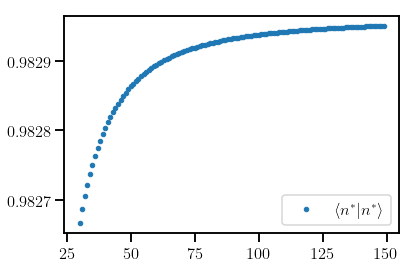

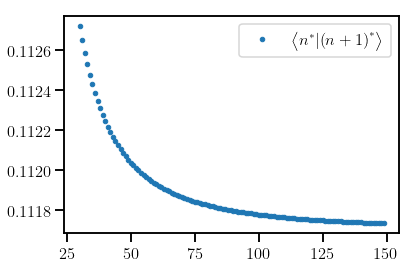

In [41]:
n = np.arange(30, 150, 1)

n1 = n
n1_star = n1-qd(n, 3.26896, -0.138, 0.9)
n2 = n
n2_star = n2-qd(n, 3.371, 0.5, -10)

y1 = semiclassical_overlap(n1, n1_star, n2, n2_star)

n1 = n
n1_star = n1-qd(n, 3.26896, -0.138, 0.9)
n2 = n+1
n2_star = n2-qd(n, 3.371, 0.5, -10)

y2 = semiclassical_overlap(n1, n1_star, n2, n2_star)

plt.figure()
plt.plot(n, np.abs(y1), '.', label=r'$\left\langle{n^*}|{n^*}\right\rangle$')
plt.legend()
plt.show()

plt.figure()
plt.plot(n, np.abs(y2), '.', label=r'$\left\langle{n^*}|{\left(n+1\right)^*}\right\rangle$')
plt.legend()
plt.show()